In [74]:
# zones times dots
38*3600

136800

In [75]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np


file = r"V:\Projects\35 East Wacker\TerraCotta\_Preliminary Models\2021\35 Wacker 2020 N + E_multisheet.xlsx"

df = pd.read_excel(file, sheet_name = "Main")
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
X = df.loc[:,["x","y"]].values
Z = linkage(X,
            method='complete',  # dissimilarity metric: max distance across all pairs of 
                                # records between two clusters
            metric='euclidean'
    )                           # you can peek into the Z matrix to see how clusters are 
                                # merged at each iteration of the algorithm



max_d = 73.6

clusters = fcluster(Z, max_d, criterion='distance')

clusters

num_clusters = len(set(clusters))

num_clusters


950

In [76]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=34, 
       min_samples=1, 
       metric='euclidean', 
       metric_params=None, 
       algorithm='auto', 
       leaf_size=30, 
       p=None, 
       n_jobs=None).fit(Z)

db

DBSCAN(algorithm='auto', eps=34, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=None, p=None)

In [77]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
#X = np.array([[1, 2], [1, 4], [1, 0],
#               [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters=None, 
                                     distance_threshold=None).fit(X)

AgglomerativeClustering()

result = clustering.labels_

#for x in result:
#    print(x)
    
len(set(result))

TypeError: __init__() got an unexpected keyword argument 'distance_threshold'

In [ ]:
import numpy as np
import scipy.spatial as spatial

points = X
point_tree = spatial.cKDTree(points)
# This finds the index of all points within distance 1 of [1.5,2.5].
print(point_tree.query_ball_point([1.5, 2.5], 1))
# [0]

# This gives the point in the KDTree which is within 1 unit of [1.5, 2.5]
print(point_tree.data[point_tree.query_ball_point([1.5, 2.5], 1)])
# [[1 2]]

# More than one point is within 3 units of [1.5, 1.6].
print(point_tree.data[point_tree.query_ball_point([1.5, 1.6], 3)])
# [[1 2]
#  [3 4]]

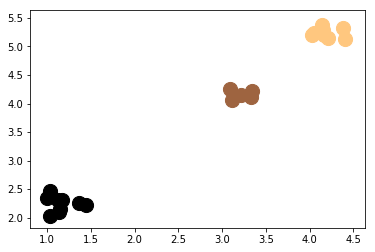

In [79]:
import numpy as np
import scipy.spatial as spatial
import matplotlib.pyplot as plt
np.random.seed(2015)

centers = [(1, 2), (3, 4), (4, 5)]
points = np.concatenate([pt+np.random.random((10, 2))*0.5 
                         for pt in centers])
point_tree = spatial.cKDTree(points)
#print(point_tree)
cmap = plt.get_cmap('copper')
colors = cmap(np.linspace(0, 1, len(centers)))
for center, group, color  in zip(centers, point_tree.query_ball_tree(centers, 0.5), colors):
   cluster = point_tree.data[group]
   x, y = cluster[:, 0], cluster[:, 1]
   plt.scatter(x, y, c=color, s=200)

plt.show()

In [95]:
import numpy as np
import scipy.spatial as spatial
import matplotlib.pyplot as plt
np.random.seed(2015)

points = X

tree = spatial.cKDTree(points)

a = tree.query_ball_point(points, 34)

len(a)

3633

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import networkx as nx
import scipy.spatial as sp

def cluster(data, epsilon,N): #DBSCAN, euclidean distance
    db     = DBSCAN(eps=epsilon, min_samples=N).fit(data)
    labels = db.labels_ #labels of the found clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #number of clusters
    clusters   = [data[labels == i] for i in range(n_clusters)] #list of clusters
    return clusters, n_clusters

centers = [[1, 1,1], [-1, -1,1], [1, -1,1]]
X,_ = make_blobs(n_samples=N, centers=centers, cluster_std=0.4,
                            random_state=0)
cluster(X,epsilon,N)

NameError: name 'N' is not defined